In [13]:
#Importing the Nominatim geocoder class 
from geopy.geocoders import Nominatim
import time
from pprint import pprint

In [14]:
# address we need to geocode
loc = '17 Maarschalk Gerardstraat, 2000 Antwerpen'

In [23]:
import requests
import json

url = f'http://nominatim.openstreetmap.org/search?q={loc}&polygon_geojson=1&format=json&limit=1'

r = requests.get(url)

response = r.json()

polygon = response[0]['geojson']
polygon


{'type': 'Polygon',
 'coordinates': [[[4.403969, 51.2126528],
   [4.4041879, 51.2125604],
   [4.4042394, 51.2126082],
   [4.4042287, 51.2126139],
   [4.4040205, 51.2127006],
   [4.403969, 51.2126528]]]}

In [24]:
import rasterio as rio
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [25]:
# Transform projection of imagery to specific coordinate system

# Specify output projection system
dst_crs = 'EPSG:4326'

# Input imagery file name before transformation
input_imagery_file = r'D:\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k15\GeoTIFF\DHMVIIDSMRAS1m_k15.tif'
# Save output imagery file name after transformation
transformed_imagery_file = r'D:\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k15\GeoTIFF\TRF_DHMVIIDSMRAS1m_k15.tif'

with rio.open(input_imagery_file) as imagery:
    transform, width, height = calculate_default_transform(imagery.crs, dst_crs, imagery.width, imagery.height, *imagery.bounds)
    kwargs = imagery.meta.copy()
    kwargs.update({'crs': dst_crs, 'transform': transform, 'width': width, 'height': height})
    with rio.open(transformed_imagery_file, 'w', **kwargs) as dst:
        for i in range(1, imagery.count + 1):
            reproject(
                source=rio.band(imagery, i),
                destination=rio.band(dst, i),
                src_transform=imagery.transform,
                src_crs=imagery.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

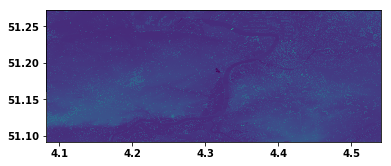

Transformed Imagery file Projection:  EPSG:4326


In [26]:
# Plot again after transformation. You can observe axis value have changed
tr_imagery = rio.open(r'D:\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k15\GeoTIFF\TRF_DHMVIIDSMRAS1m_k15.tif')
# Plot trasformed imagery
show(tr_imagery)

# Check coordinate reference system of transformed imagery, it's changed or not?
print('Transformed Imagery file Projection: ', tr_imagery.crs)
# tr_imagery.crs

In [27]:
Transform projection of imagery to specific coordinate system

# Specify output projection system
dst_crs = 'EPSG:4326'

# Input imagery file name before transformation
input_imagery_file = r'D:\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k15\GeoTIFF\DHMVIIDTMRAS1m_k15.tif'
# Save output imagery file name after transformation
transformed_imagery_file = r'D:\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k15\GeoTIFF\TRF_DHMVIIDTMRAS1m_k15.tif'

with rio.open(input_imagery_file) as imagery:
    transform, width, height = calculate_default_transform(imagery.crs, dst_crs, imagery.width, imagery.height, *imagery.bounds)
    kwargs = imagery.meta.copy()
    kwargs.update({'crs': dst_crs, 'transform': transform, 'width': width, 'height': height})
    with rio.open(transformed_imagery_file, 'w', **kwargs) as dst:
        for i in range(1, imagery.count + 1):
            reproject(
                source=rio.band(imagery, i),
                destination=rio.band(dst, i),
                src_transform=imagery.transform,
                src_crs=imagery.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

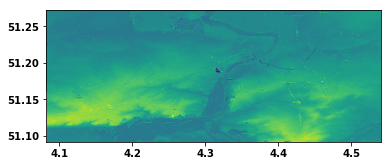

Transformed Imagery file Projection:  EPSG:4326


In [28]:
# Plot again after transformation. You can observe axis value have changed
tr_imagery = rio.open(r'D:\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k15\GeoTIFF\TRF_DHMVIIDTMRAS1m_k15.tif')
# Plot trasformed imagery
show(tr_imagery)

# Check coordinate reference system of transformed imagery, it's changed or not?
print('Transformed Imagery file Projection: ', tr_imagery.crs)
# tr_imagery.crs

In [ ]:
# Masking the raster using the polygon

In [32]:
DSM_fp = r'D:\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k15\GeoTIFF\TRF_DHMVIIDSMRAS1m_k15.tif'
DTM_fp = r'D:\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k15\GeoTIFF\TRF_DHMVIIDTMRAS1m_k15.tif'


In [35]:
with rio.open(DSM_fp) as src:
    out_image, out_transform = mask(src, polygon, crop=True)
    out_meta = src.meta

AttributeError: 'str' object has no attribute 'get'